<h1> A. MLP </h1>
<p> We will Implement a MultiLayer Perceptron (MLP) from scratch.
Which is a type of artificial neural network used for classification and regression tasks. 

For MLP to work, it needs:</p>

 - Input Layer: This is where the data goes in.
 - Hidden Layers: These are the layers where the magic happens. The network processes the input data and starts to learn patterns. Each layer takes the output of the previous layer and transforms it further.
 - Output Layer: This layer gives the final answer.

in our case : 
- 1 input layer (x) with 2 neurons (x0, x1)
- two hidden layers (h(0), h(1)) with 10 neurons each of them.
- 1 output layer of nerons (o) with 2 neurons (each of the two output neurons representing one class)


<h2> 1. Activation and Loss functions. </h2>

- Activation Functions:
    - For input layer: No activation function is needed here as we are just passing the input.
    - For Hidden layer: We will use Rectified Linear Unit (ReLU) as its a good choice since it helps with the vanishing gradient problem that might occur and is computationally efficient.
    - For Output layer: We will choose Softmax as it converts the outputs into probabilities and also work well with Cross-Entropy Loss it also ensures that one class dominates (has the highest probability), making the decision straightforward.

- Loss Functions:
<p> we will choose Cross-Entropy Loss as It measures the difference between predicted probabilities and the true labels. which is the Ideal option for our classification task</p>


<h2> 2. Learning rate, batch size, initialization </h2>

- Learning Rate: the value chosen is 0.10.1 because its common and its considered moderate learning rate which will ensure the model converges efficiently without overshooting the optimal weights.

- Batch Size: the value chosen is Full-batch Gradient Descent (all data used at once per epoch), we will use it for simplicity and since datasets are small (410 training samples), full-batch ensures stable gradient updates.
    - if the dataset was larger we could use something like 32, 64 or 256 but because its small we are using 410 in which  Batch Size = Total Number of Training Samples = 410 [ results will be less noisy ]
    - In our implementation, there is no explicit batch size as it processes all training examples at once in each epoch. This can be seen in the train_mlp_relu function where the entire training set (X_train, y_train) is passed to the forward and backward propagation functions.


- Initialization: the method Used is Xavier Initialization, since it ensures weights are neither too small nor too large, keeping gradients stable during training and it balances the variance of inputs and outputs for each layer.       


<h2> 3. Training </h2>

- Loss Plots:
      Training and validation loss curves were plotted to monitor performance.
      Loss decreased over epochs, showing the model is learning effectively.

- Stopping Criterion: Manual Stopping; training was stopped after 10000 epochs.
  Loss converged, with minimal difference between training and validation loss, indicating no overfitting.

- Final Accuracy: Accuracy can be computed from the validation dataset predictions, provided after section 4

<h2> 4. Implementation </h2>

- Make sure excel files are in the right path: have a look at variables train_data & validate_data or keep excel files in the same directory of this notebook.
- You will need to run this command to install openpyxl which is needed for our implementation: ``conda install -c anaconda openpyxl`` or ``pip install openpyxl``

Epoch 0: Training Loss = 0.6939, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 100: Training Loss = 0.6543, Validation Loss = 0.6539, Training Accuracy = 0.6488, Validation Accuracy = 0.6829
Epoch 200: Training Loss = 0.5789, Validation Loss = 0.5894, Training Accuracy = 0.6780, Validation Accuracy = 0.6585
Epoch 300: Training Loss = 0.4463, Validation Loss = 0.4831, Training Accuracy = 0.8439, Validation Accuracy = 0.7683
Epoch 400: Training Loss = 0.3340, Validation Loss = 0.3953, Training Accuracy = 0.8659, Validation Accuracy = 0.8049
Epoch 500: Training Loss = 0.3087, Validation Loss = 0.3820, Training Accuracy = 0.8707, Validation Accuracy = 0.8049
Epoch 600: Training Loss = 0.2954, Validation Loss = 0.3707, Training Accuracy = 0.8780, Validation Accuracy = 0.8293
Epoch 700: Training Loss = 0.2861, Validation Loss = 0.3603, Training Accuracy = 0.8805, Validation Accuracy = 0.8537
Epoch 800: Training Loss = 0.2786, Validation Loss = 0.354

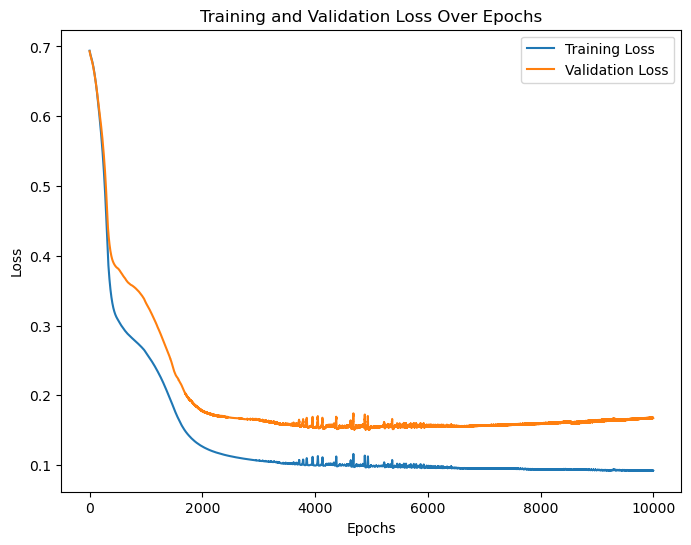

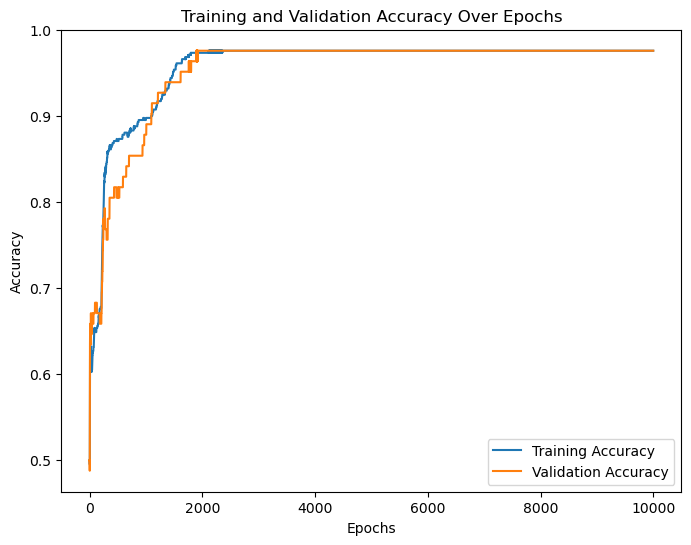

<Figure size 640x480 with 0 Axes>


Final Results:
Final Training Loss: 0.0922
Final Validation Loss: 0.1673
Final Training Accuracy: 0.9756
Final Validation Accuracy: 0.9756


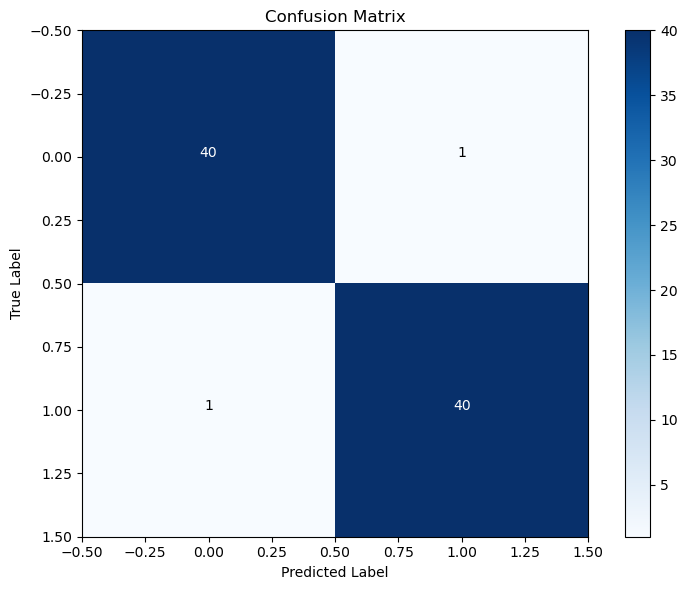


Confusion Matrix Analysis:
True Negatives: 40
False Positives: 1
False Negatives: 1
True Positives: 40


Precision Metric: 0.9756


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Our Helper functions
def normalize_features(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def relu(z):
    return np.maximum(0, z)

# ReLU choosen for hidden layer
def relu_derivative(z):
    return (z > 0).astype(float)

# softmax choosen for Output layer
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Xavier initialization
def xavier_initialization(input_size, hidden_layer_size, output_size):
    parameters = {
        "W1": np.random.randn(input_size, hidden_layer_size) * np.sqrt(1 / input_size),
        "b1": np.zeros((1, hidden_layer_size)),
        "W2": np.random.randn(hidden_layer_size, hidden_layer_size) * np.sqrt(1 / hidden_layer_size),
        "b2": np.zeros((1, hidden_layer_size)),
        "W3": np.random.randn(hidden_layer_size, output_size) * np.sqrt(1 / hidden_layer_size),
        "b3": np.zeros((1, output_size))
    }
    return parameters

def forward_propagation_relu(X, parameters):
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    A2 = relu(Z2)
    Z3 = np.dot(A2, parameters["W3"]) + parameters["b3"]
    A3 = softmax(Z3)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3}
    return A3, cache

def backward_propagation_relu(X, y_true, cache, parameters):
    m = X.shape[0]
    A3, A2, A1 = cache["A3"], cache["A2"], cache["A1"]
    Z2, Z1 = cache["Z2"], cache["Z1"]
    
    dZ3 = A3 - y_true
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    dA2 = np.dot(dZ3, parameters["W3"].T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, parameters["W2"].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    grads = {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    return grads

# Updating parameters 
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    parameters["W3"] -= learning_rate * grads["dW3"]
    parameters["b3"] -= learning_rate * grads["db3"]
    return parameters

# Compute cross-entropy loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_probs = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
    loss = np.sum(log_probs) / m
    return loss

def compute_accuracy(y_true, y_pred):
    """Calculate the accuracy of predictions"""
    predicted_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    return np.mean(predicted_classes == true_classes)

# Train Relu
def train_mlp_relu(X_train, y_train, X_validate, y_validate, hidden_layer_size, learning_rate, epochs):
    parameters = xavier_initialization(X_train.shape[1], hidden_layer_size, y_train.shape[1])
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred, cache = forward_propagation_relu(X_train, parameters)
        train_loss = compute_loss(y_train, y_pred)
        train_accuracy = compute_accuracy(y_train, y_pred)
        
        # Backward pass
        grads = backward_propagation_relu(X_train, y_train, cache, parameters)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Validation predictions and metrics
        val_pred, _ = forward_propagation_relu(X_validate, parameters)
        val_loss = compute_loss(y_validate, val_pred)
        val_accuracy = compute_accuracy(y_validate, val_pred)
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
                  f"Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    
    return parameters, train_losses, val_losses, train_accuracies, val_accuracies

# Load and prepare the data [ input layer]
train_data = pd.read_excel("./THA2train.xlsx")
validate_data = pd.read_excel("./THA2validate.xlsx")

# Prepare data
X_train = normalize_features(train_data[["X_0", "X_1"]].values)
y_train = pd.get_dummies(train_data["y"]).values

X_validate = normalize_features(validate_data[["X_0", "X_1"]].values)
y_validate = pd.get_dummies(validate_data["y"]).values

# Train the model, note 10000 epchs choosed 
hidden_layer_size = 10
learning_rate = 0.1
epochs = 10000

parameters, train_losses, val_losses, train_accuracies, val_accuracies = train_mlp_relu(
    X_train, y_train, X_validate, y_validate, 
    hidden_layer_size, learning_rate, epochs
)

# Plot losses
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Over Epochs")
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Results:")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")

# Confusion Matrix 
# Get predictions for validation set
val_pred, _ = forward_propagation_relu(X_validate, parameters)
y_val_pred = np.argmax(val_pred, axis=1)
y_val_true = np.argmax(y_validate, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)

# Create confusion matrix plot using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the cells
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print classification metrics
print("\nConfusion Matrix Analysis:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# Calculate additional metrics
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

print("\n")
print(f"Precision Metric: {precision:.4f}")




<h3>Final accuracy & the Confusion Matrix </h3>
<p>here is the final accuracy obtained and the confusion matrix on
the validation dataset.</p>

- Validation Accuracy=97.56% [which is: Total Number of Predictions / Number of Correct Predictions]

    - Validation Accuracy = (40+40) / (40+40+1+1) = 0.9756

- Confusion Matrix:
    - True Positives (TP): 40
    - True Negatives (TN): 40
    - False Positives (FP): 1
    - False Negatives (FN): 1


<h3> Conclusion for part A </h3>
<p> Our choices made the model as the best model for us, suitable for binary classification tasks while incorporating good practices like: </p>

- Proper initialization
- Modern activation functions
- Appropriate loss function
- Performance monitoring
- Validation to check for overfitting 